In [39]:
pd.DataFrame(x,y).corr()

,0
0,1.0


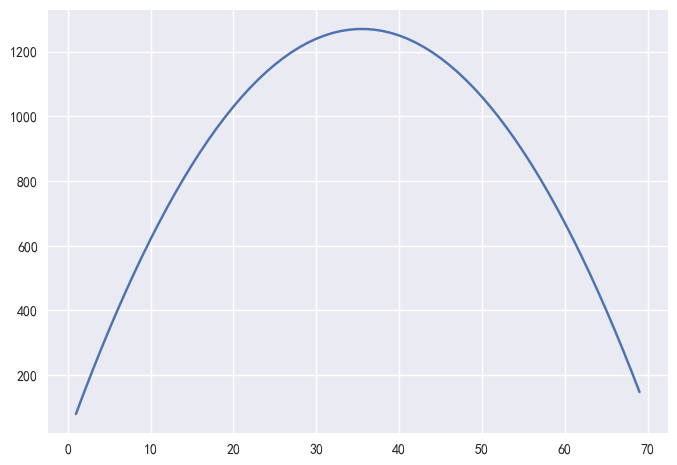

In [36]:
x = [i for i in range(1,70)]
y = [10-i**2+71*i for i in x]
plt.plot(x,y)

In [ ]:
# DW检验 代表残差序列的相关性，如果在1-3之外，则表示样本不是随机的，需要检查原数据

In [27]:
# 高次项
#加入（年龄）高次项
data['Age_sq'] = data['Age']**2
#重新拟合模型（年龄高次项）
#公式
formula_4 = 'avg_exp~gender+Age_sq+Age+Ownrent+Selfempl+dist_home_val+dist_avg_income+edu_1+edu_2+edu_3+edu_4'
#实例化
model_4 = ols(formula=formula_4, data=data)
#拟合模型
model_4 = model_4.fit()
#输出拟合结果
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                avg_exp   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     16.07
Date:                Fri, 17 Mar 2023   Prob (F-statistic):           1.64e-14
Time:                        11:23:21   Log-Likelihood:                -517.49
No. Observations:                  76   AIC:                             1059.
Df Residuals:                      64   BIC:                             1087.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -635.5772    518.442     -1.226      0.225   -1671.283     400.129
gender           -476.3444     93.386     -5.101      0.000    -662.904    -289.784
Age_sq             -1.1368      0.450     -2.526      0.014      -2.036      -0.238
Age                78.0905     30.829      2.533      0.014      16.502     139.679
Ownrent            36.9995     73.019      0.507      0.614    -108.873     182.872
Selfempl           98.2309    123.270      0.797      0.428    -148.030     344.492
dist_home_val       0.5155      0.839      0.615      0.541      -1.160       2.191
dist_avg_income    87.2842     16.281      5.361      0.000      54.758     119.810
edu_1            -223.8123     80.750     -2.772      0.007    -385.129     -62.496
edu_2            -491.9894     89.700     -5.485      0.000    -671.186    -312.793
edu_3            -338.3891    152.151     -2.224      0.030    -642.347     -34.432
edu_4             -94.1811    288.192     -0.327      0.745    -669.910     481.548
==============================================================================
Omnibus:                        0.902   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.637   Jarque-Bera (JB):                0.369
Skew:                          -0.001   Prob(JB):                        0.831
Kurtosis:                       3.342   Cond. No.                     2.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 交互项
#加入（年龄性别）交互项
data['Age_gender'] = data['Age']*data['gender']
#重新拟合模型（年龄性别交互项）
#公式
formula5 = 'avg_exp~gender+Age_sq+Age+Age_gender+Ownrent+Selfempl+dist_home_val+dist_avg_income+edu_1+edu_2+edu_3+edu_4'
#实例化
model_5 = ols(formula=formula5, data=data)
#拟合模型
model_5 = model_5.fit()
#输出拟合结果
model_5.summary()

pandas.core.frame.DataFrame

In [36]:
model_3 = ols(formula=formula_2, data=xtrain.join(ytrain))
#拟合模型
model_3 = model_3.fit()
mean_squared_error(ytest,model_3.predict(xtest))

111903.9824843345

In [33]:
from xgboost.sklearn import XGBRegressor
XGB = XGBRegressor()
XGB.fit(xtrain,ytrain)
mean_squared_error(ytest,XGB.predict(xtest))

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

73774.30091610803

In [31]:
from sklearn import tree
DT = tree.DecisionTreeRegressor()
DT.fit(xtrain,ytrain)
mean_squared_error(ytest,DT.predict(xtest))

DecisionTreeRegressor()

87701.92144493366

In [29]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(oob_score=True)
RF.fit(xtrain,ytrain)
mean_squared_error(ytest,RF.predict(xtest))

RandomForestRegressor()

86651.39842223392

In [37]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(oob_score=True)
RF.fit(xtrain,ytrain)
mean_squared_error(ytest,RF.predict(xtest))

RandomForestRegressor(oob_score=True)

85390.00156373235

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain,ytrain)
# 计算线性模型的评估指标
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest,lr.predict(xtest))

LinearRegression()

111903.98248433531

In [28]:
mean_squared_error(ytest,model_2.predict(xtest))

61629.30472448511

In [24]:
# 划分数据集
y = data.pop('avg_exp')
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(data,y,test_size=0.2,random_state=422)

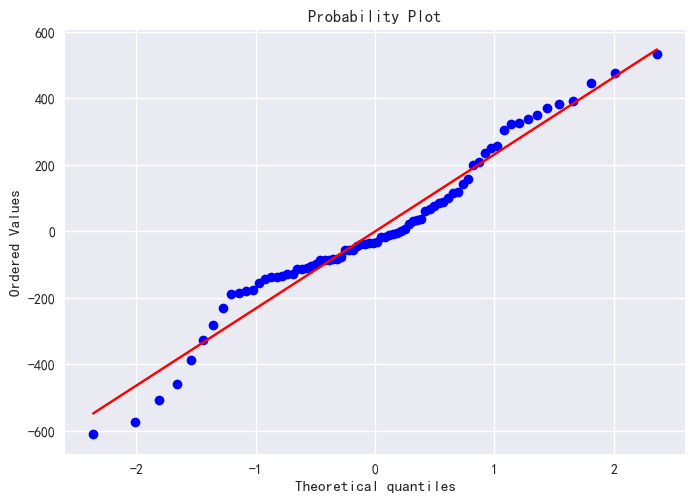

In [22]:
# 正态性
res = stats.probplot(model_2.resid, plot=plt)
#因变量取对数 ，因为如果小数影响较大，避免找改变数据量纲，把线路向上平移+1
# data['ln_avg_exp'] = np.log(data['avg_exp']+1)

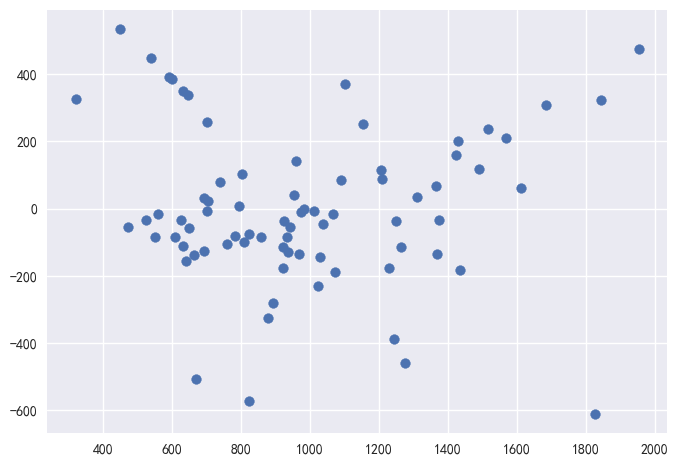

In [21]:
# 同方差 绘制残差图
# 一元回归： 横轴为自变量，纵轴为model_2.resid残差
# 多元回归： 横轴为拟合值，纵轴为残差 model_2.predict(data)   #拟合值
#残差图：如果为喇叭状就需要处理，对Y取对数，出现非正态也是对Y取对数
plt.scatter(model_2.predict(data), model_2.resid)

In [20]:
#重新拟合模型
#公式
formula_2 = 'avg_exp~gender+Age+Ownrent+Selfempl+dist_home_val+dist_avg_income+edu_1+edu_2+edu_3+edu_4'
#实例化
model_2 = ols(formula=formula_2, data=data)
#拟合模型
model_2 = model_2.fit()
#输出拟合结果
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                avg_exp   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     15.74
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           7.14e-14
Time:                        22:43:52   Log-Likelihood:                -521.10
No. Observations:                  76   AIC:                             1064.
Df Residuals:                      65   BIC:                             1090.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         553.7869    225.685      2.454      0.017     103.062    1004.511
gender           -472.4592     97.160     -4.863      0.000    -666.502    -278.416
Age                 1.1111      4.832      0.230      0.819      -8.539      10.761
Ownrent            11.9649     75.277      0.159      0.874    -138.374     162.304
Selfempl          108.9822    128.194      0.850      0.398    -147.038     365.002
dist_home_val       0.2724      0.867      0.314      0.754      -1.459       2.004
dist_avg_income    97.5291     16.408      5.944      0.000      64.761     130.297
edu_1            -247.4391     83.459     -2.965      0.004    -414.119     -80.759
edu_2            -486.1425     93.307     -5.210      0.000    -672.489    -299.796
edu_3            -315.3806    158.038     -1.996      0.050    -631.005       0.244
edu_4               3.8444    297.148      0.013      0.990    -589.602     597.291
==============================================================================
Omnibus:                        1.093   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.521
Skew:                          -0.056   Prob(JB):                        0.771
Kurtosis:                       3.390   Cond. No.                         993.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#去掉共线性高的变量
data.drop('Income', axis=1, inplace=True)

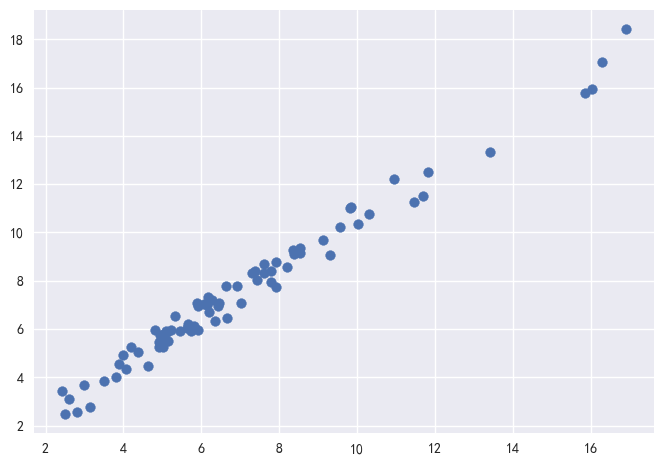

In [21]:
plt.scatter(data_vif['Income'],data_vif['dist_avg_income'])
#两者有极高的线性相关，删除其中一项再重新建模

In [18]:
#计算每个变量的VIF值 1-3正常，3-10岭回归处理，>10建议删除
for i in range(0,data_vif.shape[1]):
    print(data_vif.columns[i], vif(data_vif,i))

gender 2.209191974683995
Age 1.3708810657506336
Income 64.76239230667088
Ownrent 1.6682817716496416
Selfempl 1.2887640187408762
dist_home_val 1.1654312430431528
dist_avg_income 64.13992249399934
edu_class 1.994586770890881
Inter 59.346326941669986


In [19]:
#查看单个变量的vif值
vif(data_vif, 2)
#上面运行不出来的看这里，版本问题
# vif(data_vif.values, 2)

64.76239230667133

In [17]:
# vif时，需手动添加截距项
#手动去除因变量
#手动添加截距项
data_vif = data.drop(['avg_exp'], axis=1)
data_vif['Inter'] = 1  #相当于添加了截距项
data_vif.drop(['edu_1', 'edu_2', 'edu_3', 'edu_4'], axis=1, inplace=True)

In [17]:
# 模型调优；共性性、同方差、正态性、内生性（不要遗漏变量）
# 原假设是同方差、且服从正态分布
# 共线性
# from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
# vif用于计算方差膨胀因子，vif=1/(1-r^2)

In [ ]:
#常用接口
dir(model)
# 残差
model.resid

In [16]:
# 回归分析
# import statsmodels.api as sm
#建立模型过程
formula = 'avg_exp~gender+Age+Income+Ownrent+Selfempl+dist_home_val+dist_avg_income+edu_1+edu_2+edu_3+edu_4'
#实例化
model = ols(formula=formula, data=data)
#拟合模型
model = model.fit()
#输出拟合结果
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                avg_exp   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     14.93
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           8.36e-14
Time:                        22:43:08   Log-Likelihood:                -519.52
No. Observations:                  76   AIC:                             1063.
Df Residuals:                      64   BIC:                             1091.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         535.9565    223.038      2.403      0.019      90.387     981.526
gender           -447.4828     97.100     -4.608      0.000    -641.463    -253.503
Age                 0.6121      4.779      0.128      0.898      -8.936      10.160
Income           -119.1929     72.411     -1.646      0.105    -263.850      25.464
Ownrent            41.3184     76.416      0.541      0.591    -111.341     193.977
Selfempl          153.7000    129.424      1.188      0.239    -104.853     412.253
dist_home_val       0.1579      0.859      0.184      0.855      -1.557       1.873
dist_avg_income   211.5250     71.122      2.974      0.004      69.442     353.608
edu_1            -262.5083     82.890     -3.167      0.002    -428.100     -96.916
edu_2            -495.1400     92.266     -5.366      0.000    -679.462    -310.818
edu_3            -292.5211    156.617     -1.868      0.066    -605.400      20.358
edu_4              49.3783    294.618      0.168      0.867    -539.188     637.945
==============================================================================
Omnibus:                        0.894   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.613
Skew:                          -0.219   Prob(JB):                        0.736
Kurtosis:                       3.044   Cond. No.                     1.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

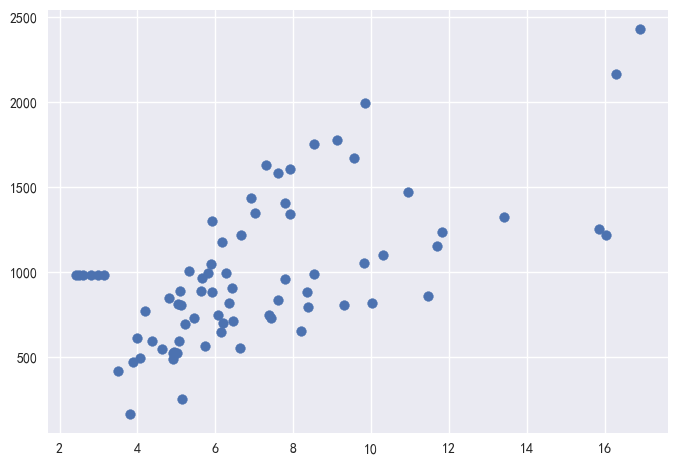

In [24]:
# avg_exp和Income
plt.scatter(data['Income'], data['avg_exp'])

In [ ]:
#热力图
# sns.heatmap(data.corr(), annot=True)   显示具体的相关系数计算结果
sns.heatmap(data.corr())

In [ ]:
# 相关分析
data.corr()
#分类变量与连续变量的相关系数计算：肯德尔相关系数
data[['avg_exp', 'gender', 'Ownrent', 'Selfempl', 'edu_class']].corr(method='kendall')
#分类变量与分类变量的相关系数计算：斯皮尔曼相关系数
data[['gender', 'Ownrent', 'Selfempl', 'edu_class']].corr(method='spearman')

In [15]:
#将哑变量合并到原数据
data = pd.concat([data_raw, dummy], axis=1)

In [14]:
# 哑变量转换
#edu_class哑变量转换
dummy = pd.get_dummies(data_raw['edu_class'], prefix='edu', drop_first=True)
dummy.head()

,edu_1,edu_2,edu_3,edu_4
0,0,0,0,0
1,1,0,0,0
2,0,0,0,0
3,1,0,0,0
4,0,0,0,0


In [13]:
#将异常值使用除异常值之外的数据的均值进行填补
data_raw['Age'].iloc[40] = data_raw['Age'].drop(index=40).mean()

In [12]:
# 3倍标准差
from scipy import stats
#标准化数据(Age)
z = stats.zscore(data_raw['Age'])
#寻找异常数据的索引
z[(z>3)|(z<-3)]
#查看异常数据的值
data_raw['Age'].iloc[40]

40    8.643062
Name: Age, dtype: float64

999

In [ ]:
# 异常值
# dist_avg_income
sns.boxplot(data=data_raw['dist_avg_income'])
sns.boxplot(data=data_raw['Age'])

In [18]:
data_raw['edu_class'].value_counts()

2    25
1    23
0    22
3     5
4     1
Name: edu_class, dtype: int64

In [11]:
#对原数据进行编码
data_raw['edu_class'] = data_raw['edu_class'].apply(lambda x: label.index(x))

In [10]:
#方法2：edu_class
label = data_raw['edu_class'].unique().tolist()
label

['研究生', '大学', '中学', '小学及以下', nan]

In [9]:
# 数据编码
#方法1：gender
data_raw['gender'] = data_raw['gender'].map({'Male':1, 'Female':0})

In [8]:
# 填补缺失值
#avg_exp
data_raw['avg_exp'].fillna(data_raw['avg_exp'].mean(), inplace=True)

#方法2
# data_raw['avg_exp'] = data_raw['avg_exp'].fillna(data_raw['avg_exp'].mean())

In [7]:
#查看缺失情况
data_raw.isnull().mean()
data_raw.isnull().sum()

avg_exp            0.078947
gender             0.000000
Age                0.000000
Income             0.000000
Ownrent            0.000000
Selfempl           0.000000
dist_home_val      0.000000
dist_avg_income    0.000000
edu_class          0.013158
dtype: float64

avg_exp            6
gender             0
Age                0
Income             0
Ownrent            0
Selfempl           0
dist_home_val      0
dist_avg_income    0
edu_class          1
dtype: int64

In [6]:
#删除重复值
data_raw.drop_duplicates(inplace=True)

In [6]:
#查看是否有重复值
data_raw.duplicated().mean()
data_raw.duplicated().sum()

0.0

0

In [5]:
# 数据清洗
#变量'id','Acc','edad2'无用
data_raw.drop(['id','Acc','edad2'], axis=1, inplace=True)    #方法1:inplace

# data_raw = data_raw.drop(['id','Acc','edad2'], axis=1)    方法2：覆盖原始数据

In [6]:
data_raw['Acc'].value_counts()

1    76
Name: Acc, dtype: int64

In [ ]:
# 一行代码输出统计分析报告
# import pandas_profiling as pp
# report = pp.ProfileReport(data_raw)
#
# # 报告输出为html
# report.to_file("report_output1114.html")
#
# #报告输出到notebook
# # report.to_notebook_iframe()

In [ ]:
# 数据探索
# pip install ruamel-yaml -i https://pypi.tuna.tsinghua.edu.cn/simple

# pip install pandas-profiling -i https://pypi.tuna.tsinghua.edu.cn/simple

# pip install markupsafe==2.0.1

In [5]:
#数据基本信息
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               76 non-null     int64  
 1   Acc              76 non-null     int64  
 2   avg_exp          70 non-null     float64
 3   gender           76 non-null     object 
 4   Age              76 non-null     int64  
 5   Income           76 non-null     float64
 6   Ownrent          76 non-null     int64  
 7   Selfempl         76 non-null     int64  
 8   dist_home_val    76 non-null     float64
 9   dist_avg_income  76 non-null     float64
 10  edad2            76 non-null     int64  
 11  edu_class        75 non-null     object 
dtypes: float64(4), int64(6), object(2)
memory usage: 7.2+ KB


In [4]:
#读取数据
data_raw = pd.read_excel('LR_practice.xlsx')
data_raw.head()

,id,Acc,avg_exp,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,edad2,edu_class
0,19,1,1217.03,Male,40,16.03515,1,1,99.93,15.932789,1600,研究生
1,5,1,1251.50,Male,32,15.84750,1,0,49.88,15.796316,1024,大学
2,86,1,856.57,Male,41,11.47285,1,0,16.10,11.275632,1681,研究生
3,50,1,1321.83,Male,28,13.40915,1,0,100.39,13.346474,784,大学
4,67,1,816.03,Male,41,10.03015,0,1,119.76,10.332263,1681,研究生


In [3]:
plt.style.use('seaborn')
#设置字体为黑色
plt.rcParams['font.family']='SimHei'
#显示符号
plt.rcParams['axes.unicode_minus']= False

In [2]:
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
import os
os.chdir('C:\Data\Jupyter_file\统计建模')